In [3]:
import numpy as np
import matplotlib.pyplot as plt


### Generate Correlated Data in 2D

(0.0, 100.0)

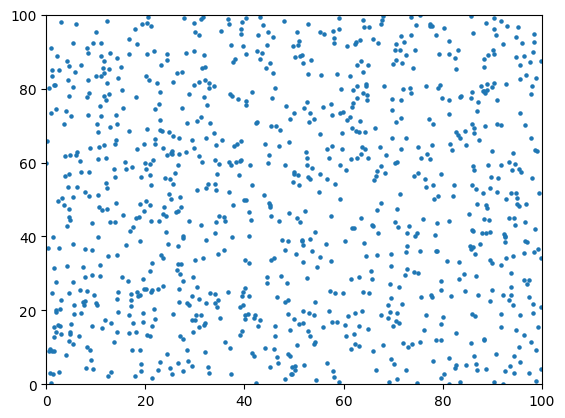

In [93]:
## First, we generate the 2d box with 1000 random points: 
N = 1000
h = 100 # height 
w = 100 # width


def f_rand(N,h,w): 
    s = []
    for i in range(N):
        x = np.random.uniform(0,h)
        y = np.random.uniform(0,w)  
        x = x % h # periodicity condition
        y = y % w
        s.append((x,y))
    return s



R = np.array(f_rand(N,h,w))
x_c, y_c = zip(*R)
plt.scatter(x_c, y_c,5)
plt.xlim(0, w)
plt.ylim(0, h)

In [124]:
size = 100  # Size of the 2D box (side length)
num_points = 1000  # Total number of points
c_num = 20  # Number of circumferences
r_c = 30

z = num_points // c_num

# Create an empty list to store the points
D = []

# Generate random centers for the circumferences within the box
#circle_centers_x = np.array(f_rand(num_points,size,size))
#circle_centers_y = np.array(f_rand(num_points,size,size))
circle_centers_x = np.random.uniform(r_c,100,c_num)
circle_centers_y = np.random.uniform(r_c,100,c_num)



In [127]:
# Create points around each circumference
for i in range(c_num):
    center_x = circle_centers_x[i]
    center_y = circle_centers_y[i]

    for _ in range(z):
     
     theta = np.linspace(0, 2*np.pi)
     x = center_x + r_c*np.cos(theta)
     y = center_y + r_c*np.sin(theta)
     x = x % h 
     y = y % w 
    
    # Append the points to the list
    D.extend(list(zip(x, y)))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


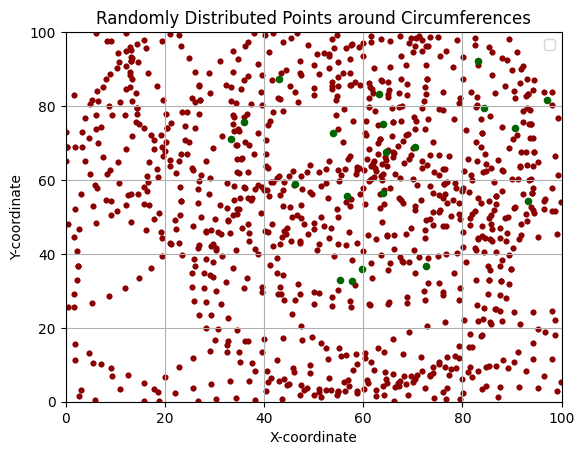

In [128]:
# Ensure we have the desired number of points
# Plot the points
#plt.figure(figsize=(8, 8))
plt.scatter(*zip(*D), s=10, color='darkred', marker='o')
plt.scatter(circle_centers_x, circle_centers_y, s=20, c='darkgreen', marker='o')
plt.xlim(0, size)
plt.ylim(0, size)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Randomly Distributed Points around Circumferences')
plt.grid(True)
plt.legend()
plt.show()
# np.savetxt('points_catalog.csv', points, delimiter=',')

In [122]:
D = np.array(D)

def f_distance(p1, p2):
    return np.linalg.norm(p1 - p2)



distance_D = []

for i in range(num_points): 
    for j in range(i+1,num_points): 
        distance = f_distance(D[i],D[j])
        distance_D.append(distance)




Sum of normalized histogram bins: 1.0


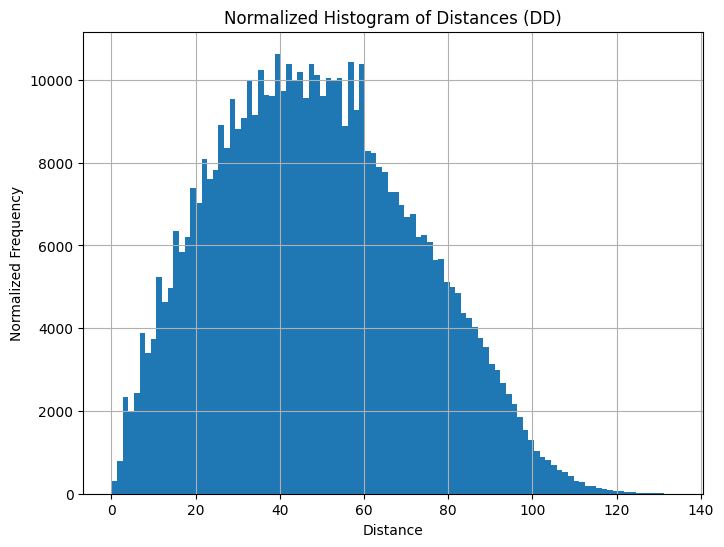

In [140]:
num_bins = 100 #len(distance_D)
hist_min = min(distance_D)
hist_max = max(distance_D)

hist1, bin_edges1 = np.histogram(distance_D, bins=num_bins, range=(hist_min, hist_max))


DD = hist1/np.sum(hist1)

# Verify that the sum of all bins adds up to approximately 1
print("Sum of normalized histogram bins:", np.sum(DD))


plt.bar(bin_edges1[:-1], hist1, width=bin_edges1[1]-bin_edges1[0], align='edge')
plt.xlabel('Distance')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Histogram of Distances (DD)')
plt.grid(True)
plt.show()


In [132]:
# Plot histogram
#plt.hist(distance_D, bins=num_bins, range=(hist_min, hist_max), alpha=0.7, color='blue')
#plt.xlabel('Distance')
#plt.ylabel('Frequency')
#plt.title('Histogram of Distances between 2D Points')
#plt.grid(True)
#plt.show()


In [133]:
distance_R = []

for i in range(num_points): 
    for j in range(i+1,num_points): 
        distance = f_distance(R[i],R[j])
        distance_R.append(distance)




Sum of normalized histogram bins: 0.9999999999999998


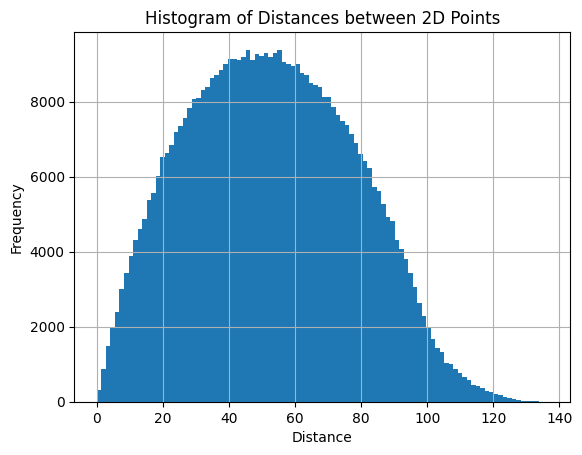

In [147]:
histR_min = min(distance_R)
histR_max = max(distance_R)

hist2, bin_edges2 = np.histogram(distance_R, bins=num_bins, range=(histR_min, histR_max))

RR = hist2/np.sum(hist2)

print("Sum of normalized histogram bins:", np.sum(RR))

plt.bar(bin_edges2[:-1], hist2, width=bin_edges2[1]-bin_edges2[0], align='edge')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances between 2D Points')
plt.grid(True)
plt.show()


Sum of normalized histogram bins (DR): 1.0


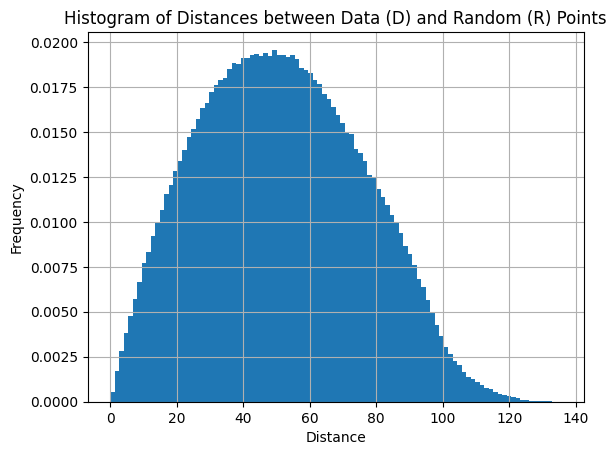

In [156]:

distance_dr = []
for d_point in D:
    for r_point in R:
        distance  = f_distance(d_point, r_point)
        distance_dr.append(distance)

num_bins = 100  # Adjust this value for your desired number of bins
histdr_min = min(distance_dr)
histdr_max = max(distance_dr)

distance_dr_norm = distance_dr/np.sum(distance_dr) 
histdr_min_norm = min(distance_dr_norm)
histdr_max_norm = max(distance_dr_norm)

# Create histogram
hist_DR, bin_edges_DR = np.histogram(distance_dr, bins=num_bins, range=(histdr_min, histdr_max))

DR = hist_DR/np.sum(hist_DR)


# Verify that the sum of all bins adds up to approximately 1
print("Sum of normalized histogram bins (DR):", np.sum(DR))


# Plot histogram
plt.bar(bin_edges_DR[:-1], DR, width=bin_edges_DR[1]-bin_edges_DR[0], align='edge')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances between Data (D) and Random (R) Points')
plt.grid(True)
plt.show()


In [202]:
box_size = 100

bin_edges_DD = np.linspace(0, box_size * np.sqrt(2), len(DD) + 1)  # Adjust bin edges as needed
bin_edges_RR = np.linspace(0, box_size * np.sqrt(2), len(RR) + 1)  # Adjust bin edges as needed
bin_edges_DR = np.linspace(0, box_size * np.sqrt(2), len(DR) + 1)  # Adjust bin edges as needed

DDRR = DD*RR
R2 = R**2
# Peebles − Hauser estimator 
r = (bin_edges_DD[1:] + bin_edges_DD[:-1]) / 2  # Bin centers
corr_function_ph = (DD/RR) - 1

# Davis − Peebles estimator
corr_function_dp = (DD/DR) - 1

# Hamilton estimator 
#corr_function_h = (DDRR)/R2 -1 

# Landy − Szalay
corr_function_ls = (DD - 2*DR+RR)/RR






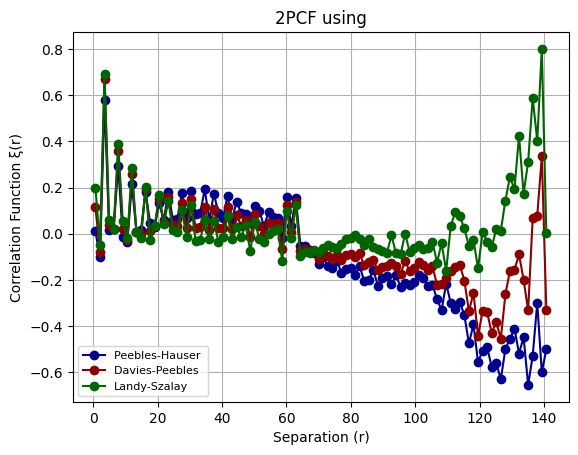

In [224]:

plt.plot(r, corr_function_ph,  marker='o', color='darkblue', linestyle='-', label='Peebles-Hauser ')
plt.plot(r, corr_function_dp,  marker='o', color='darkred',  linestyle='-',label='Davies-Peebles ',)
plt.plot(r, corr_function_ls,  marker='o', color='darkgreen',linestyle='-',label='Landy-Szalay',)
plt.xlabel('Separation (r)')
plt.ylabel('Correlation Function ξ(r)')
plt.legend(fontsize=8)
plt.title('2PCF using')
plt.grid(True)